# Intel Image Classification Using CNN
_______
![Natural View](img.gif)



### This project focuses on classifying natural scenes around the world using image data. The dataset comprises collection images, each with a size of 150x150 pixels. These images are distributed across six distinct categories:

1. buildings -> (Label: 0)
2. forest -> (Label: 1)
3. glacier -> (Label: 2)
4. mountain (Label: 3)
5. sea -> (Label: 4)
6. street -> (Label: 5)

<font size="+1" color=blue ><b>The primary goal of this project is The model should be capable of accurately predicting the category of a given natural scene image, enabling automated classification..</b></font>

 ### we will using CNN with Keras 



In [2]:
!pip install tensorflow


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [6]:
data_train= 'E:\level 4\machine learing\projects\seg_train'
data_test= 'E:\level 4\machine learing\projects\seg_test'
data_pred= 'E:\level 4\machine learing\projects\seg_pred'

 
 <font size="+1" color=blue ><b>let's go to  explor the dataset </b></font>

Training data: 2191 in folder buildings
Training data: 2271 in folder forest
Training data: 2404 in folder glacier
Training data: 2512 in folder mountain
Training data: 2274 in folder sea
Training data: 2382 in folder street


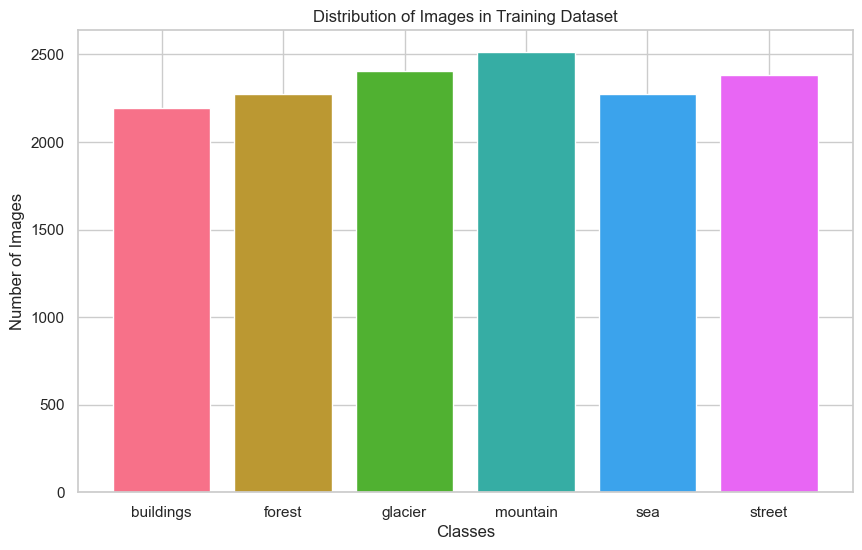


The total number of images in 6 classes of Training data: 14034

Testing data: 437 in folder buildings
Testing data: 474 in folder forest
Testing data: 553 in folder glacier
Testing data: 525 in folder mountain
Testing data: 510 in folder sea
Testing data: 501 in folder street


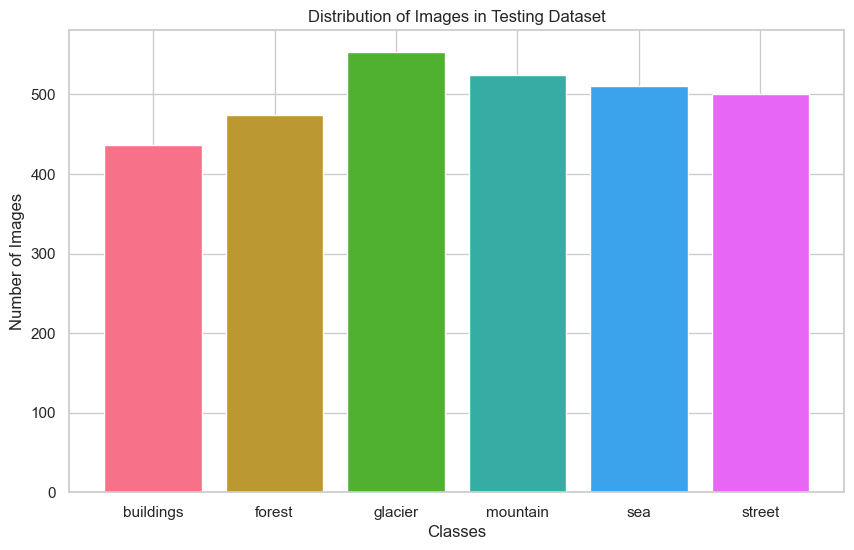


The total number of images in 6 classes of Testing data: 3000



In [5]:
def visualize(data_path, dataset_type):
    total_files = 0
    class_counts = []
    colors = sns.color_palette("husl", len(os.listdir(data_path)))

    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        files = gb.glob(os.path.join(folder_path, '*.jpg'))

        total_files += len(files)
        class_counts.append(len(files))
        
        print(f'{dataset_type} data: {len(files)} in folder {folder}')

    # Visualize the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(os.listdir(data_path), class_counts, color=colors)
    plt.title(f'Distribution of Images in {dataset_type} Dataset')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.show()

    print(f'\nThe total number of images in {len(os.listdir(data_path))} classes of {dataset_type} data: {total_files}\n')

# Visualize training data
visualize(data_train, 'Training')

# Visualize testing data
visualize(data_test, 'Testing')


<font size="+1" color=blue ><b> preprocessing</b></font>

In [6]:
names_of_the_class = os.listdir(data_train)
names_of_the_class

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [7]:
names_of_the_class = os.listdir(data_test)
names_of_the_class

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [8]:

size = []
for folder in os.listdir(data_train):
    folder_path = os.path.join(data_train, folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))
    
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)

pd.Series(size).value_counts()


(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(134, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(105, 150, 3)        1
(97, 150, 3)         1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(140, 150, 3)        1
Name: count, dtype: int64

In [9]:
size = []
for folder in os.listdir(data_test):
    folder_path = os.path.join(data_test, folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
Name: count, dtype: int64

# read all images and convert it into arrays

In [7]:
id = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def class_name(n) : 
    for x , y in id.items() : 
        if n == y : 
            return x    

In [8]:
s = 150  

In [9]:
X_train = []
y_train = []
for folder in os.listdir(data_train):
    folder_path = os.path.join(data_train, folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        
        X_train.append(list(image_array))
        y_train.append(id[folder])

In [10]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


show the  random of  pictures in X_train with class_lable

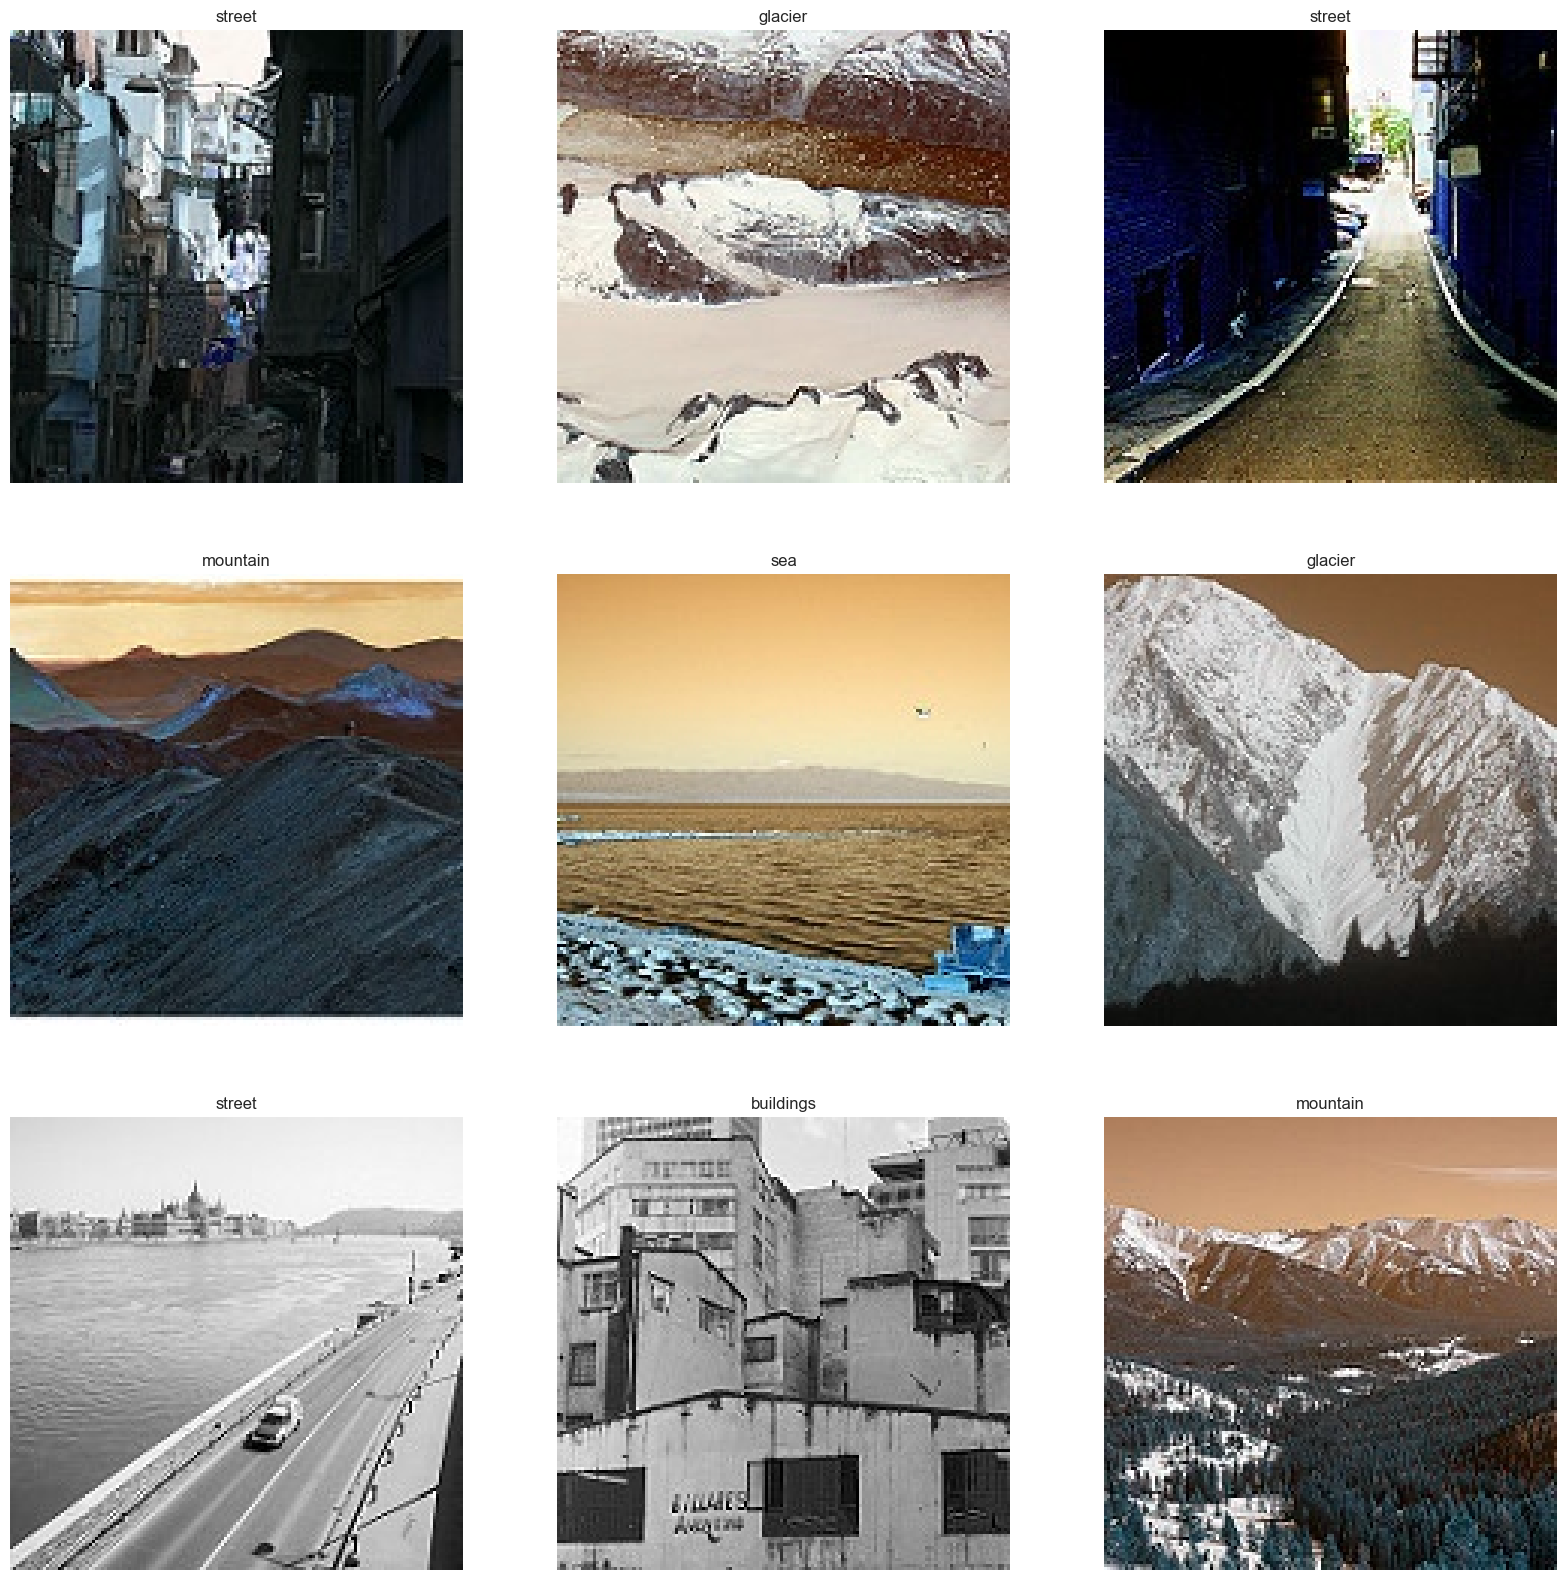

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(class_name(y_train[i]))

In [12]:
X_test = []
y_test = []
for folder in os.listdir(data_test):
    folder_path = os.path.join(data_test, folder)
    files = gb.glob(os.path.join(folder_path, '*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        
        X_test.append(list(image_array))
        y_test.append(id[folder])
        

In [13]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


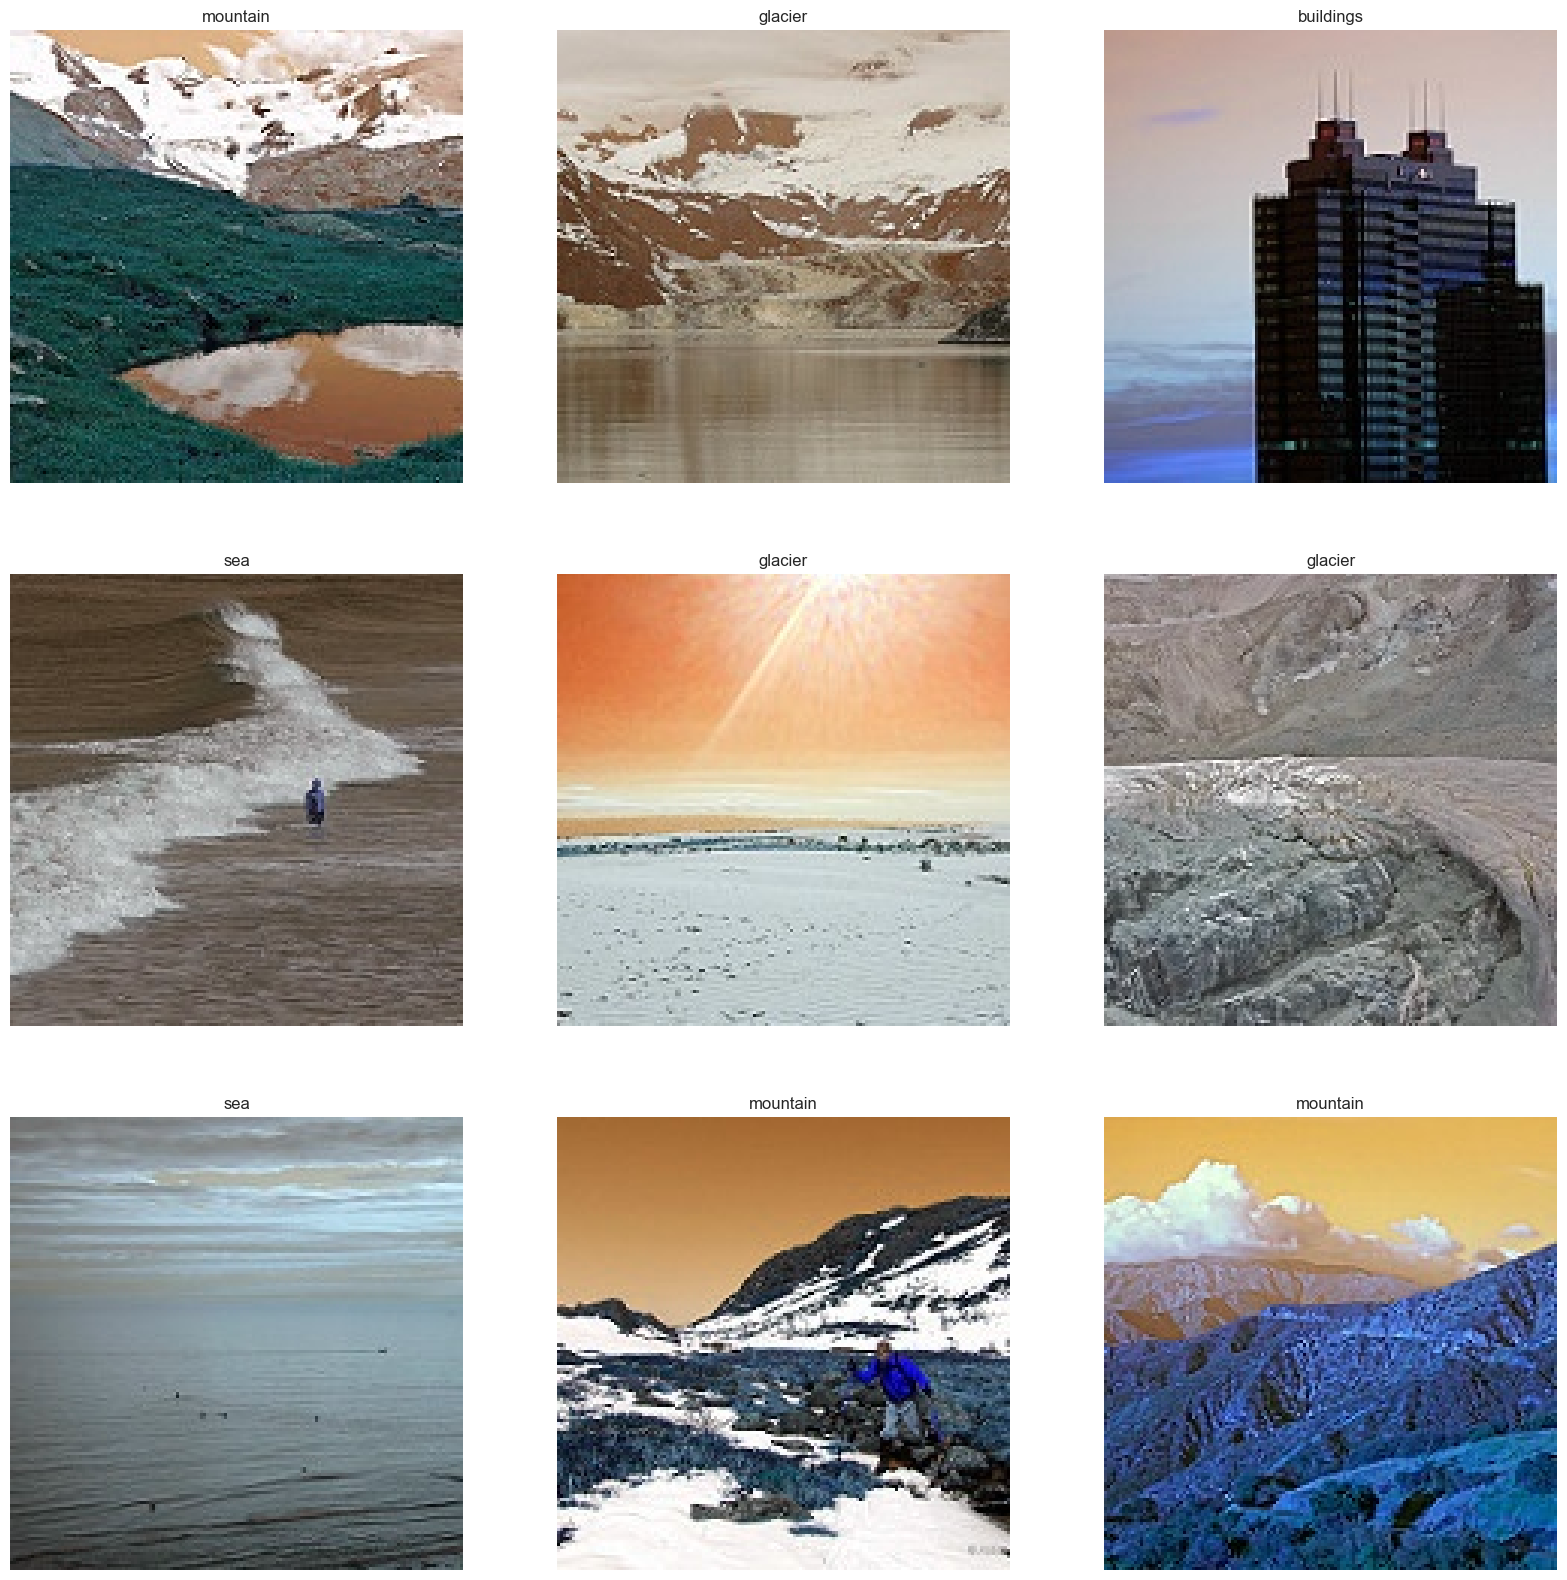

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(class_name(y_test[i]))

In [15]:
X_pred = []
files = gb.glob(pathname=str(data_pred + '/*.jpg'))
for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (s, s))
    X_pred.append(list(image_array))
print(len(X_pred))

7301


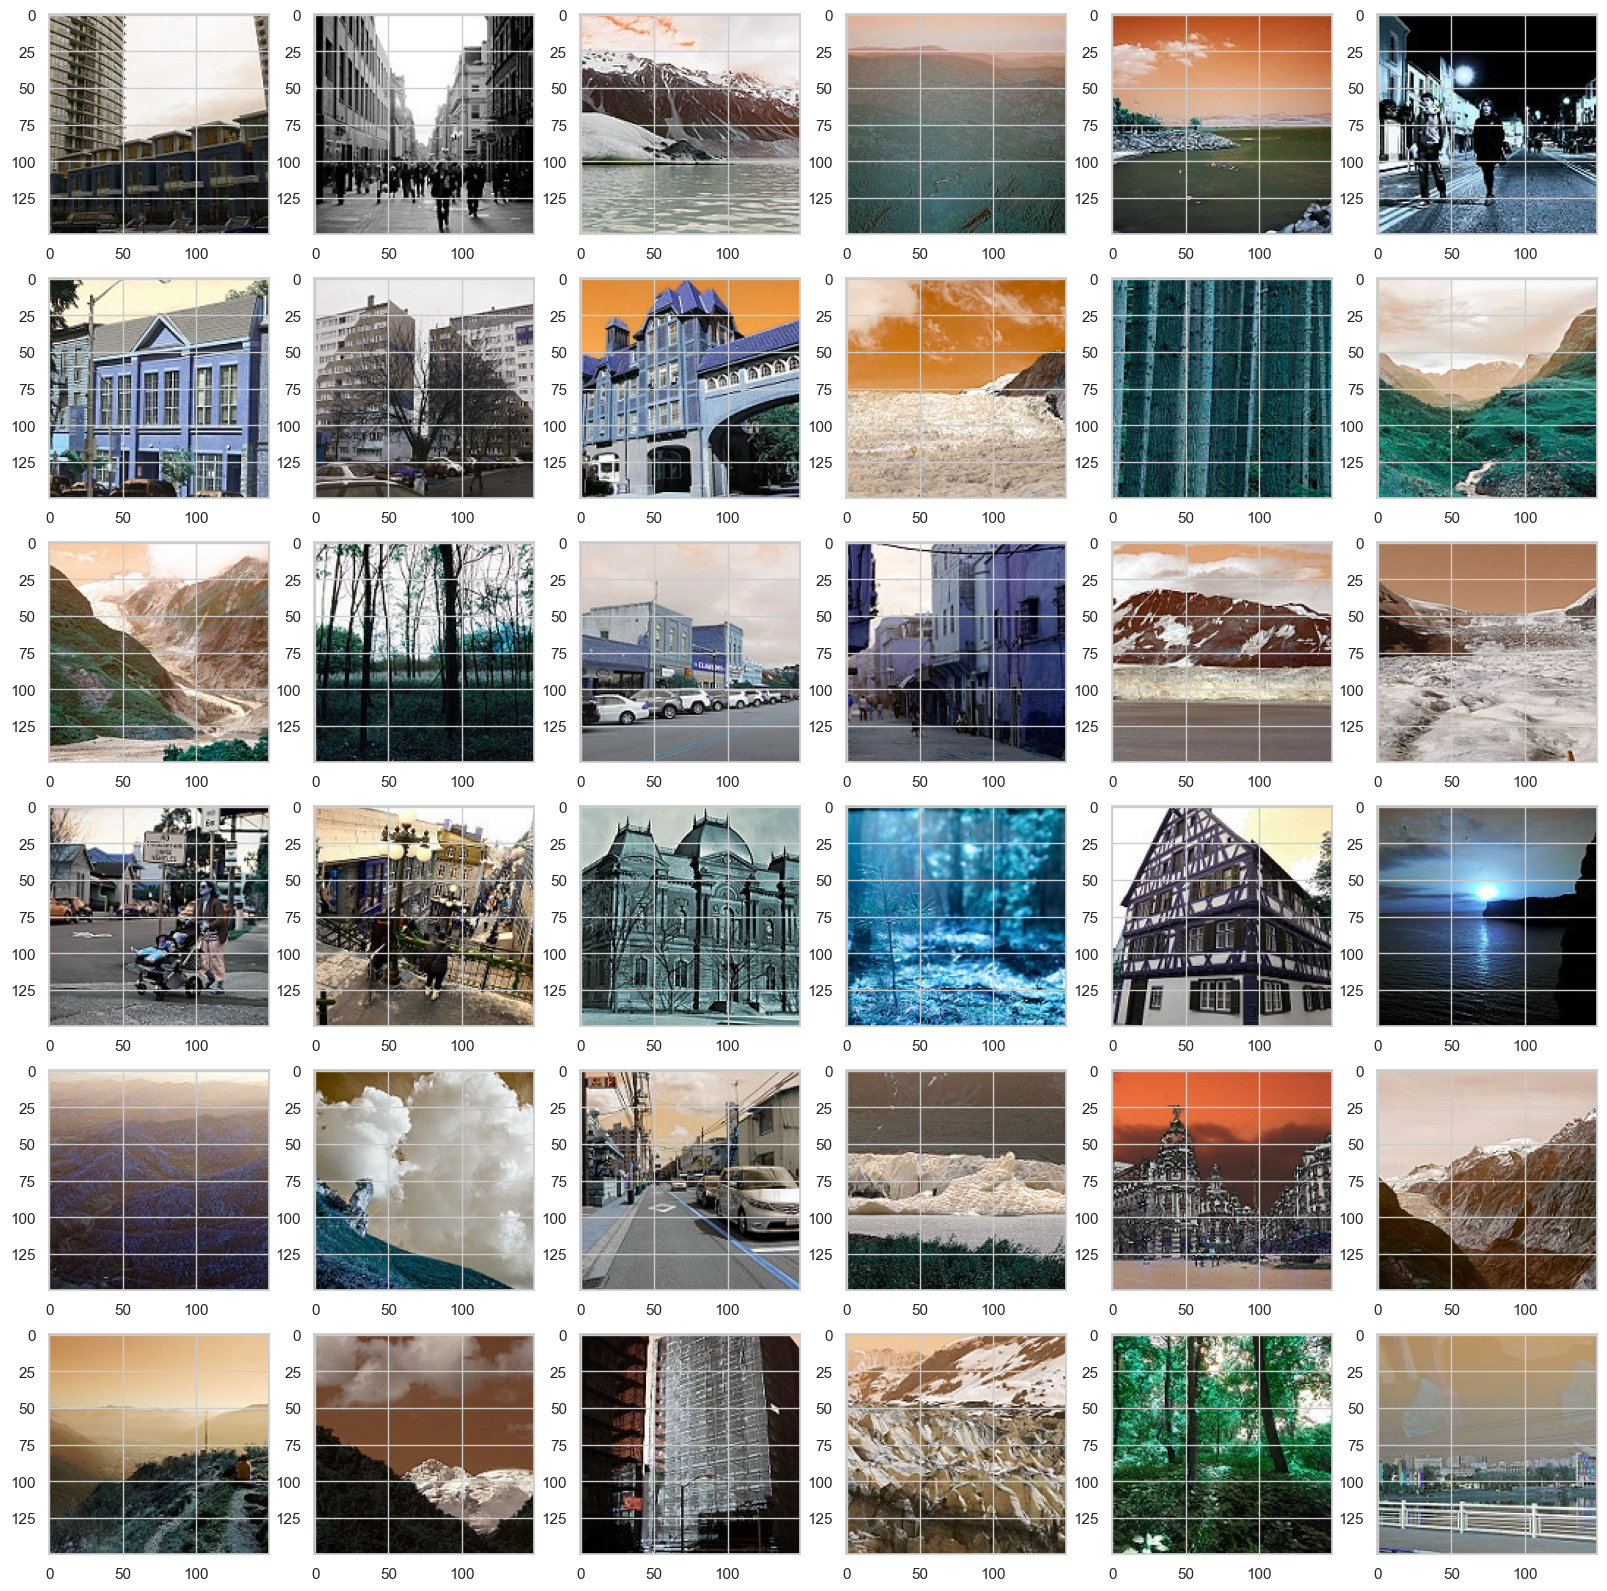

In [16]:
import matplotlib.pyplot as plt

# Assuming X_pred is your prediction data
# Make sure X_pred has some images before proceeding
if len(X_pred) > 0:
    plt.figure(figsize=(20, 20))
    
    # Limit the number of random indices to the length of X_pred
    num_indices = min(36, len(X_pred))
    
    for n, i in enumerate(list(np.random.randint(0, len(X_pred), num_indices))):
        plt.subplot(6, 6, n + 1)
        plt.imshow(X_pred[i])
else:
    print("No images found in X_pred.")


MODEL

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 150, 150, 3)
X_test shape  is (3000, 150, 150, 3)
X_pred shape  is (7301, 150, 150, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

s = 150 

# Create a Sequential model
KerasModel = models.Sequential([
    layers.Conv2D(200, kernel_size=(3, 3), activation='relu', input_shape=(s, s, 3)),
    layers.Conv2D(150, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(4, 4),
    layers.Conv2D(120, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(80, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(4, 4),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(6, activation='softmax'),
])

# Print the summary of the model
KerasModel.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 150)     270150    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 120)       162120    
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 80)        86480     
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 50)        36050     
                                                      

In [19]:
from tensorflow.keras import layers, models, optimizers



In [21]:

from tensorflow.compat.v1.keras.losses import sparse_categorical_crossentropy

KerasModel.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])


now to train the model , lets use 50 epochs now

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# EarlyStopping callback
erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# ModelCheckpoint callback
mod_chk = ModelCheckpoint(filepath='E:\level 4\machine learing\projects/my_model.hdf5', monitor='val_loss', save_best_only=True)

# ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)


In [24]:
from tensorflow.compat.v1.ragged import RaggedTensorValue


In [26]:
!pip install --upgrade tensorflow


In [ ]:

epochs = 3  
history = KerasModel.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    
)

# Evaluate the model on the test set
test_loss, test_acc = KerasModel.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Epoch 1/3
439/439 [==============================] - 4443s 10s/step - loss: 1.2780 - accuracy: 0.4706 - val_loss: 0.9112 - val_accuracy: 0.6223
Epoch 2/3
439/439 [==============================] - 5188s 12s/step - loss: 1.0288 - accuracy: 0.5935 - val_loss: 0.8241 - val_accuracy: 0.6597
Epoch 3/3
 28/439 [>.............................] - ETA: 1:49:05 - loss: 0.8914 - accuracy: 0.6440

In [ ]:
KerasModel.save('E:\level 4\machine learing\projects/my_model.hdf5'')


In [ ]:
# Load the best model for deployment
saved_model = load_model('E:\level 4\machine learing\projects/my_model.hdf5')

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

ok , only 80% accuracy & can be increased by tuning the hyperparameters



_______

now to predict X test

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

great

now it's time to redict X Predict

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

and to show random redicted pictures & its predicting category


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming KerasModel is your trained model and X_test, y_test are your testing data
# Adjust this based on your actual variable names

# Predictions on the test set
y_pred = KerasModel.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred_classes)
print(class_report)
